In [306]:
import yaml
import pandas as pd
import time
from backend.utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1h"

training_file_path: str = f"../data/twelvedata/feature time series ({interval})/AMZN_feature_time_series.csv"
validation_file_path: str = f"../data/twelvedata/feature time series ({interval})/AAPL_feature_time_series.csv"

start_time = time.time()
pd.set_option('display.max_columns', None)

training_df = pd.read_csv(training_file_path)
validation_df = pd.read_csv(validation_file_path)


In [307]:
import numpy as np

training_preprocessor = DataPreprocessor(training_df)
validation_preprocessor = DataPreprocessor(validation_df)

X_train = training_preprocessor.target_data_batched
y_train = training_preprocessor.target_data_batched_labels

X_val = validation_preprocessor.target_data_batched
y_val = validation_preprocessor.target_data_batched_labels

print("Training Dataset shape:", training_df.shape)
print("Validation Dataset shape:", validation_df.shape)

end_time = time.time()
loading_time = end_time - start_time
print("Loading time: ", loading_time)

# for column in training_preprocessor.target_data.columns:
    # print(column)
    # print(training_preprocessor.target_data[column].isnull().sum())
    # print(training_preprocessor.target_data[column].isin([np.inf, -np.inf]).sum())
training_preprocessor.target_data

Training Dataset shape: (4970, 32)
Validation Dataset shape: (4970, 32)
Loading time:  1.2692694664001465


,open,high,low,close,volume,percent_b,atr,macd,macd_signal,macd_hist,adx,sma,ema,rsi,%K,%D,vpt,day,hour,open change,high change,low change,close change,price movement,price range,price trend,open trend,high trend,low trend,close trend,volume trend,target change,target trend,target
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-15 11:30:00,3039.80,3054.16,3034.00,3053.95,253344,0.272713,27.3411,3.3948,11.5878,-8.1930,30.8201,3066.2178,3065.2394,47.1858,22.7188,11.2743,2.464190e+04,0,11,-0.0004,-0.0013,0.0006,0.0048,14.15,20.16,1,0,0,1,1,0,-0.0027,0,0
2021-03-15 12:30:00,3051.32,3057.65,3043.62,3051.26,188022,0.241165,26.3903,1.7886,9.6280,-7.8394,28.8839,3065.0311,3062.4436,46.4934,21.0544,17.0354,2.447628e+04,0,12,0.0038,0.0011,0.0032,-0.0009,-0.06,14.03,0,1,1,1,0,0,-0.0004,0,0
2021-03-15 13:30:00,3050.41,3068.00,3048.81,3065.31,213247,0.356154,25.8760,1.6305,8.0285,-6.3979,26.9849,3063.5400,3063.0168,50.5730,36.4854,26.7529,2.545821e+04,0,13,-0.0003,0.0034,0.0017,0.0046,14.90,19.19,1,0,1,1,1,1,-0.0009,0,1
2021-03-15 14:30:00,3066.51,3074.78,3062.90,3065.05,235488,0.349095,24.8763,1.4674,6.7163,-5.2488,25.4956,3063.1833,3063.4235,50.4963,36.4602,31.3333,2.543824e+04,0,14,0.0053,0.0022,0.0046,-0.0001,-1.46,11.88,0,1,1,1,0,1,-0.0006,0,1
2021-03-15 15:30:00,3065.03,3082.12,3062.02,3082.12,199954,0.508431,24.5351,2.6846,5.9099,-3.2253,24.4062,3064.3433,3067.1628,55.2921,75.9411,49.6289,2.655183e+04,0,15,-0.0005,0.0024,-0.0003,0.0056,17.09,20.10,1,0,1,0,1,0,0.0003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-09 11:30:00,150.77,151.28,150.54,151.22,3775952,1.008814,1.0514,0.5178,-0.1869,0.7047,30.0487,149.0167,149.2326,69.0447,99.0881,97.4366,-3.888126e+07,1,11,0.0065,0.0025,0.0057,0.0030,0.45,0.74,1,1,1,1,1,0,0.0067,1,1
2024-01-09 12:30:00,151.23,151.71,151.13,151.40,5313652,0.957940,1.0177,0.6868,-0.0122,0.6989,30.5978,149.4633,149.6661,69.7538,95.5777,97.5230,-3.887493e+07,1,12,0.0031,0.0028,0.0039,0.0012,0.17,0.58,1,1,1,1,1,1,0.0056,1,1
2024-01-09 13:30:00,151.40,151.40,150.77,151.08,3591093,0.873467,0.9900,0.7858,0.1474,0.6384,30.6325,149.8733,149.9489,66.8230,91.0128,95.2262,-3.888252e+07,1,13,0.0011,-0.0020,-0.0024,-0.0021,-0.32,0.63,0,1,0,0,0,0,0.0057,1,1


In [308]:

X_train = X_train[:-training_preprocessor.trend_length]
y_train = y_train[:-training_preprocessor.trend_length]

X_val = X_val[:-validation_preprocessor.trend_length]
y_val = y_val[:-validation_preprocessor.trend_length]

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])

print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)


Training sets shape: (4963, 3, 33) (4963,)
Validation sets shape: (4963, 3, 33) (4963,)


In [309]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_reshaped = scaler.fit_transform(X_train_reshaped)
X_val_scaled_reshaped = scaler.transform(X_val_reshaped)

X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)

In [310]:
from backend.models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
epochs: int = config["model"]["epochs"]
batch_size: int = config["model"]["batch_size"]
my_model = StockTrendLSTMModel(input_shape, X_train_scaled, y_train, X_val_scaled, y_val, epochs, batch_size)
history = my_model.train()

Total number of weights in the model: 1761
Epoch 1/5
2482/2482 [==============================] - 18s 6ms/step - loss: 0.5252 - accuracy: 0.7580 - val_loss: 0.4732 - val_accuracy: 0.7749
Epoch 2/5
2482/2482 [==============================] - 13s 5ms/step - loss: 0.4447 - accuracy: 0.7991 - val_loss: 0.4452 - val_accuracy: 0.7917
Epoch 3/5
2482/2482 [==============================] - 13s 5ms/step - loss: 0.4201 - accuracy: 0.8134 - val_loss: 0.4209 - val_accuracy: 0.8060
Epoch 4/5
2482/2482 [==============================] - 13s 5ms/step - loss: 0.4062 - accuracy: 0.8215 - val_loss: 0.4148 - val_accuracy: 0.8108
Epoch 5/5
2482/2482 [==============================] - 13s 5ms/step - loss: 0.3904 - accuracy: 0.8322 - val_loss: 0.4012 - val_accuracy: 0.8191
Training time: 70.63 seconds
Model saved to: ../models/saved models/trained_StockTrendLSTM_model.keras


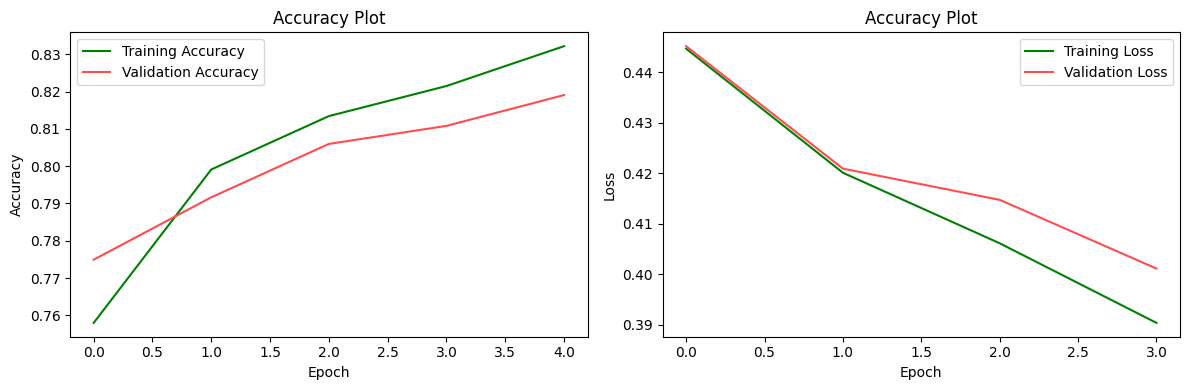

In [311]:
from backend.utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)